In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Model Complexity, Overfitting and Underfitting


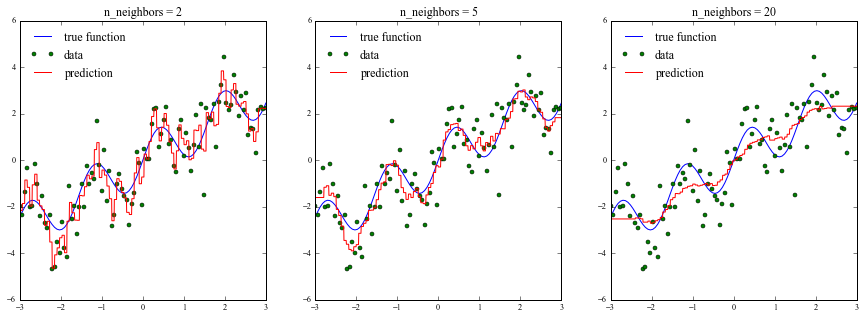

In [2]:
from plots import plot_kneighbors_regularization
plot_kneighbors_regularization()

![underfitting and overfitting](figures/overfitting_underfitting_cartoon.svg)

# Validation Curves

In [3]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.learning_curve import validation_curve

In [4]:
digits = load_digits()
X, y = digits.data, digits.target

In [5]:
model = RandomForestClassifier(n_estimators=20)
param_range = range(1, 13)
training_scores, validation_scores = validation_curve(model, X, y,
                                                      param_name="max_depth",
                                                      param_range=param_range, cv=5)

In [6]:
training_scores.shape

(12, 5)

In [7]:
def plot_validation_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc="best")

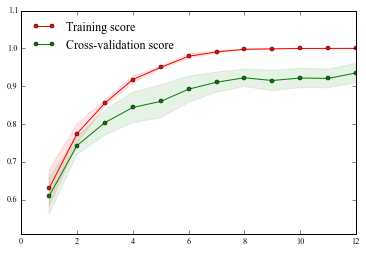

In [8]:
plt.figure()
plot_validation_curve(param_range, training_scores, validation_scores)

# Exercise

Plot the validation curve on the digit dataset for:
* a LinearSVC with a logarithmic range of regularization parameters ``C``.
* KNeighborsClassifier with a linear range of neighbors ``k``.

What do you expect them to look like? How do they actually look like?

In [ ]:
# %load solutions/validation_curve.py

In [10]:
from sklearn.svm import LinearSVC

In [24]:
model = LinearSVC()
C_range = np.logspace(-5,5,10)
training_scores2, validation_scores2 = \
    validation_curve(model, X, y,
                     param_name="C", param_range=C_range, cv=5)

[]

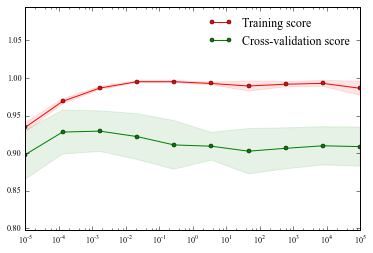

In [25]:
plot_validation_curve(C_range, training_scores2, validation_scores2)
plt.semilogx()

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
model = KNeighborsClassifier()
N_range = range(1,100,10)
training_scores3, validation_scores3 = \
    validation_curve(model, X, y,
                     param_name="n_neighbors", param_range=N_range, cv=5)

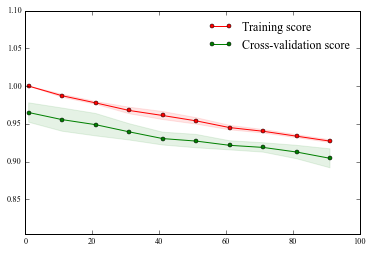

In [30]:
plot_validation_curve(N_range, training_scores3, validation_scores3)